In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
#n_units=512
n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_10degree = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [7]:
x = x_10degree[:, 0:15]

In [8]:
x = x.reshape(((72+1)*6, n_sensors, 1))

In [9]:
y_10degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [12]:
y = y_10degree.reshape((((72*1+1)*6, 100, 100)))

In [13]:
tsr = x_10degree[:, -2]

In [14]:
theta = x_10degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
#x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fifthHiddenLayerSensor')(x_)
'''x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='sixthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='seventhHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='eighthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='ninthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='tenthHiddenLayerSensor')(x_)'''
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 1024)             3072      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 1024)             1049600   
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 1024)             1049600   
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [28]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [29]:
tsr_theta_train.shape

(394, 2, 1)

In [30]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 17ms/step - loss: 0.0212 - rmse: 0.1456
Epoch 2/10000
10/10 [==============================] - 0s 14ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 3/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 4/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 5/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 6/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 7/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 8/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 9/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 10/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 11/10000
10/10 [=====

10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 85/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 86/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 87/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 88/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 89/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 90/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 91/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 92/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 93/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1105
Epoch 168/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 169/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 170/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1068
Epoch 172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1054
Epoch 174/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1054
Epoch 175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1044
Epoch 176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0731
Epoch 250/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 251/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0710
Epoch 252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 255/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 334/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 414/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 415/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 416/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8286e-04 - rmse: 0.0314
Epoch 417/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9029e-04 - rmse: 0.0315
Epoch 418/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9416e-04 - rmse: 0.0315
Epoch 419/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2497e-04 - rmse: 0.0304
Epoch 420/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4533e-04 - rmse: 0.0307
Epoch 421/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2777e-04 - rmse: 0.0305
Epoch 422/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1289e-04 - rmse: 0.030

10/10 [==============================] - 0s 4ms/step - loss: 5.1756e-04 - rmse: 0.0227
Epoch 493/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3400e-04 - rmse: 0.0231
Epoch 494/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5618e-04 - rmse: 0.0236
Epoch 495/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5055e-04 - rmse: 0.0235
Epoch 496/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0967e-04 - rmse: 0.0226
Epoch 497/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0601e-04 - rmse: 0.0225
Epoch 498/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7030e-04 - rmse: 0.0217
Epoch 499/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7987e-04 - rmse: 0.0219
Epoch 500/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8356e-04 - rmse: 0.0220
Epoch 501/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8779e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 3.6943e-04 - rmse: 0.0192
Epoch 572/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3344e-04 - rmse: 0.0183
Epoch 573/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1441e-04 - rmse: 0.0177
Epoch 574/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8286e-04 - rmse: 0.0196
Epoch 575/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4697e-04 - rmse: 0.0211
Epoch 576/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7537e-04 - rmse: 0.0194
Epoch 577/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0733e-04 - rmse: 0.0202
Epoch 578/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4009e-04 - rmse: 0.0210
Epoch 579/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0360e-04 - rmse: 0.0201
Epoch 580/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3875e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 3.2969e-04 - rmse: 0.0182
Epoch 651/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7094e-04 - rmse: 0.0165
Epoch 652/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2014e-04 - rmse: 0.0148
Epoch 653/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3321e-04 - rmse: 0.0153
Epoch 654/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2739e-04 - rmse: 0.0151
Epoch 655/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2664e-04 - rmse: 0.0151
Epoch 656/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1784e-04 - rmse: 0.0148
Epoch 657/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5522e-04 - rmse: 0.0160
Epoch 658/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4443e-04 - rmse: 0.0156
Epoch 659/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2734e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 1.8361e-04 - rmse: 0.0136
Epoch 730/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7211e-04 - rmse: 0.0131
Epoch 731/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0722e-04 - rmse: 0.0144
Epoch 732/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8513e-04 - rmse: 0.0136
Epoch 733/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8651e-04 - rmse: 0.0137
Epoch 734/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9417e-04 - rmse: 0.0139
Epoch 735/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7043e-04 - rmse: 0.0131
Epoch 736/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4603e-04 - rmse: 0.0121
Epoch 737/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5874e-04 - rmse: 0.0126
Epoch 738/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6953e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 2.2011e-04 - rmse: 0.0148
Epoch 809/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2091e-04 - rmse: 0.0149
Epoch 810/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0428e-04 - rmse: 0.0143
Epoch 811/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6339e-04 - rmse: 0.0162
Epoch 812/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0507e-04 - rmse: 0.0225
Epoch 813/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8864e-04 - rmse: 0.0170
Epoch 814/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2664e-04 - rmse: 0.0151
Epoch 815/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3536e-04 - rmse: 0.0153
Epoch 816/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8291e-04 - rmse: 0.0220
Epoch 817/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0940e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 1.2559e-04 - rmse: 0.0112
Epoch 888/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1977e-04 - rmse: 0.0109
Epoch 889/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2343e-04 - rmse: 0.0111
Epoch 890/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1886e-04 - rmse: 0.0109
Epoch 891/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0711e-05 - rmse: 0.0095
Epoch 892/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1482e-05 - rmse: 0.0096
Epoch 893/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1811e-04 - rmse: 0.0109
Epoch 894/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2870e-04 - rmse: 0.0113
Epoch 895/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0966e-04 - rmse: 0.0105
Epoch 896/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5227e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 1.7929e-04 - rmse: 0.0134
Epoch 967/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1543e-04 - rmse: 0.0147
Epoch 968/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8729e-04 - rmse: 0.0137
Epoch 969/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7746e-04 - rmse: 0.0133
Epoch 970/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8928e-04 - rmse: 0.0138
Epoch 971/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7380e-04 - rmse: 0.0132
Epoch 972/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6329e-04 - rmse: 0.0128
Epoch 973/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4521e-04 - rmse: 0.0121
Epoch 974/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1078e-04 - rmse: 0.0105
Epoch 975/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2424e-05 -

10/10 [==============================] - 0s 4ms/step - loss: 1.0320e-04 - rmse: 0.0102
Epoch 1046/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3053e-04 - rmse: 0.0114
Epoch 1047/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3265e-04 - rmse: 0.0115
Epoch 1048/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4500e-04 - rmse: 0.0120
Epoch 1049/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4007e-04 - rmse: 0.0118
Epoch 1050/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4057e-04 - rmse: 0.0119
Epoch 1051/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1202e-04 - rmse: 0.0106
Epoch 1052/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7105e-05 - rmse: 0.0088
Epoch 1053/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6544e-05 - rmse: 0.0098
Epoch 1054/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 2.5382e-04 - rmse: 0.0159
Epoch 1124/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4207e-04 - rmse: 0.0185
Epoch 1125/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6375e-04 - rmse: 0.0162
Epoch 1126/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9041e-04 - rmse: 0.0138
Epoch 1127/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6376e-04 - rmse: 0.0128
Epoch 1128/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2616e-04 - rmse: 0.0112
Epoch 1129/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1344e-04 - rmse: 0.0107
Epoch 1130/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0809e-04 - rmse: 0.0104
Epoch 1131/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0829e-04 - rmse: 0.0104
Epoch 1132/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 8.7380e-05 - rmse: 0.0093
Epoch 1202/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4271e-05 - rmse: 0.0092
Epoch 1203/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1383e-04 - rmse: 0.0107
Epoch 1204/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2688e-04 - rmse: 0.0113
Epoch 1205/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5649e-04 - rmse: 0.0125
Epoch 1206/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0949e-04 - rmse: 0.0145
Epoch 1207/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1657e-04 - rmse: 0.0147
Epoch 1208/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4709e-04 - rmse: 0.0121
Epoch 1209/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4836e-04 - rmse: 0.0122
Epoch 1210/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 7.4573e-05 - rmse: 0.0086
Epoch 1280/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0801e-04 - rmse: 0.0104
Epoch 1281/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1783e-04 - rmse: 0.0109
Epoch 1282/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9080e-05 - rmse: 0.0089
Epoch 1283/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0163e-05 - rmse: 0.0084
Epoch 1284/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5940e-05 - rmse: 0.0093
Epoch 1285/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7088e-05 - rmse: 0.0082
Epoch 1286/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7800e-05 - rmse: 0.0088
Epoch 1287/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0092e-04 - rmse: 0.0100
Epoch 1288/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.9485e-04 - rmse: 0.0140
Epoch 1358/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1370e-04 - rmse: 0.0146
Epoch 1359/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2629e-04 - rmse: 0.0112
Epoch 1360/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2648e-04 - rmse: 0.0112
Epoch 1361/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1617e-04 - rmse: 0.0108
Epoch 1362/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0755e-04 - rmse: 0.0104
Epoch 1363/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9303e-05 - rmse: 0.0100
Epoch 1364/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9160e-05 - rmse: 0.0100
Epoch 1365/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2322e-05 - rmse: 0.0096
Epoch 1366/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.5703e-04 - rmse: 0.0125
Epoch 1436/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3069e-04 - rmse: 0.0114
Epoch 1437/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1770e-04 - rmse: 0.0108
Epoch 1438/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1420e-04 - rmse: 0.0107
Epoch 1439/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9410e-05 - rmse: 0.0100
Epoch 1440/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2496e-05 - rmse: 0.0085
Epoch 1441/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7721e-05 - rmse: 0.0094
Epoch 1442/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0350e-04 - rmse: 0.0102
Epoch 1443/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2630e-04 - rmse: 0.0112
Epoch 1444/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3

10/10 [==============================] - 0s 4ms/step - loss: 2.5221e-04 - rmse: 0.0159
Epoch 1514/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1439e-04 - rmse: 0.0177
Epoch 1515/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4157e-04 - rmse: 0.0185
Epoch 1516/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5690e-04 - rmse: 0.0189
Epoch 1517/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6479e-04 - rmse: 0.0163
Epoch 1518/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5437e-04 - rmse: 0.0159
Epoch 1519/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7434e-04 - rmse: 0.0132
Epoch 1520/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1994e-04 - rmse: 0.0110
Epoch 1521/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0420e-04 - rmse: 0.0102
Epoch 1522/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.9942e-04 - rmse: 0.0141
Epoch 1592/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3530e-04 - rmse: 0.0116
Epoch 1593/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3077e-04 - rmse: 0.0114
Epoch 1594/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0609e-04 - rmse: 0.0103
Epoch 1595/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0493e-04 - rmse: 0.0102
Epoch 1596/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5565e-05 - rmse: 0.0093
Epoch 1597/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4325e-05 - rmse: 0.0074
Epoch 1598/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5212e-05 - rmse: 0.0098
Epoch 1599/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0949e-04 - rmse: 0.0105
Epoch 1600/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7

10/10 [==============================] - 0s 4ms/step - loss: 5.7693e-05 - rmse: 0.0076
Epoch 1670/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7292e-05 - rmse: 0.0082
Epoch 1671/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5094e-05 - rmse: 0.0087
Epoch 1672/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5878e-04 - rmse: 0.0126
Epoch 1673/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8677e-04 - rmse: 0.0137
Epoch 1674/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7260e-04 - rmse: 0.0165
Epoch 1675/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3617e-04 - rmse: 0.0183
Epoch 1676/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3777e-04 - rmse: 0.0184
Epoch 1677/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0178e-04 - rmse: 0.0200
Epoch 1678/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1

10/10 [==============================] - 0s 4ms/step - loss: 3.4468e-05 - rmse: 0.0059
Epoch 1748/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8799e-05 - rmse: 0.0054
Epoch 1749/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6327e-05 - rmse: 0.0051
Epoch 1750/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3839e-05 - rmse: 0.0049
Epoch 1751/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5865e-05 - rmse: 0.0051
Epoch 1752/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9811e-05 - rmse: 0.0055
Epoch 1753/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3440e-05 - rmse: 0.0048
Epoch 1754/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2608e-05 - rmse: 0.0057
Epoch 1755/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0989e-05 - rmse: 0.0071
Epoch 1756/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6

10/10 [==============================] - 0s 4ms/step - loss: 1.4127e-04 - rmse: 0.0119
Epoch 1826/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8986e-05 - rmse: 0.0094
Epoch 1827/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0570e-05 - rmse: 0.0078
Epoch 1828/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8418e-05 - rmse: 0.0076
Epoch 1829/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0514e-05 - rmse: 0.0071
Epoch 1830/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6752e-05 - rmse: 0.0068
Epoch 1831/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2069e-05 - rmse: 0.0057
Epoch 1832/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7155e-05 - rmse: 0.0052
Epoch 1833/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4429e-05 - rmse: 0.0049
Epoch 1834/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1

10/10 [==============================] - 0s 4ms/step - loss: 4.0622e-05 - rmse: 0.0064
Epoch 1904/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8478e-05 - rmse: 0.0053
Epoch 1905/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2314e-05 - rmse: 0.0047
Epoch 1906/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3873e-05 - rmse: 0.0049
Epoch 1907/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7540e-05 - rmse: 0.0052
Epoch 1908/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4423e-05 - rmse: 0.0059
Epoch 1909/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3809e-05 - rmse: 0.0058
Epoch 1910/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5682e-05 - rmse: 0.0060
Epoch 1911/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0709e-05 - rmse: 0.0055
Epoch 1912/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8

Epoch 1982/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9305e-05 - rmse: 0.0044
Epoch 1983/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2105e-05 - rmse: 0.0047
Epoch 1984/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7983e-05 - rmse: 0.0069
Epoch 1985/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4239e-05 - rmse: 0.0086
Epoch 1986/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6387e-05 - rmse: 0.0098
Epoch 1987/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6750e-04 - rmse: 0.0129
Epoch 1988/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2045e-05 - rmse: 0.0096
Epoch 1989/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7536e-05 - rmse: 0.0069
Epoch 1990/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7071e-05 - rmse: 0.0052
Epoch 1991/10000
10/10 [==============================] - 0s 4ms

10/10 [==============================] - 0s 4ms/step - loss: 9.5899e-06 - rmse: 0.0031
Epoch 2061/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0984e-05 - rmse: 0.0033
Epoch 2062/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0080e-05 - rmse: 0.0032
Epoch 2063/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5548e-06 - rmse: 0.0029
Epoch 2064/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9545e-06 - rmse: 0.0028
Epoch 2065/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8436e-06 - rmse: 0.0028
Epoch 2066/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6498e-06 - rmse: 0.0028
Epoch 2067/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0605e-05 - rmse: 0.0045
Epoch 2068/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5735e-05 - rmse: 0.0051
Epoch 2069/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2

10/10 [==============================] - 0s 4ms/step - loss: 2.8574e-04 - rmse: 0.0169
Epoch 2139/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1400e-04 - rmse: 0.0146
Epoch 2140/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7542e-04 - rmse: 0.0132
Epoch 2141/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9346e-04 - rmse: 0.0139
Epoch 2142/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7996e-04 - rmse: 0.0134
Epoch 2143/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5803e-04 - rmse: 0.0126
Epoch 2144/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5328e-04 - rmse: 0.0124
Epoch 2145/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2859e-04 - rmse: 0.0113
Epoch 2146/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9897e-05 - rmse: 0.0100
Epoch 2147/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4

10/10 [==============================] - 0s 4ms/step - loss: 1.0001e-04 - rmse: 0.0100
Epoch 2217/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0843e-04 - rmse: 0.0104
Epoch 2218/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6077e-05 - rmse: 0.0098
Epoch 2219/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0246e-04 - rmse: 0.0101
Epoch 2220/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4285e-05 - rmse: 0.0086
Epoch 2221/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0301e-05 - rmse: 0.0078
Epoch 2222/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5432e-05 - rmse: 0.0067
Epoch 2223/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8398e-05 - rmse: 0.0062
Epoch 2224/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9530e-05 - rmse: 0.0063
Epoch 2225/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9

Epoch 2295/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0944e-04 - rmse: 0.0105
Epoch 2296/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5796e-05 - rmse: 0.0081
Epoch 2297/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7360e-05 - rmse: 0.0069
Epoch 2298/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9276e-05 - rmse: 0.0054
Epoch 2299/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2398e-05 - rmse: 0.0047
Epoch 2300/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0931e-05 - rmse: 0.0056
Epoch 2301/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9460e-05 - rmse: 0.0077
Epoch 2302/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6970e-05 - rmse: 0.0098
Epoch 2303/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1506e-04 - rmse: 0.0107
Epoch 2304/10000
10/10 [==============================] - 0s 4ms

10/10 [==============================] - 0s 4ms/step - loss: 2.3594e-05 - rmse: 0.0049
Epoch 2374/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6783e-05 - rmse: 0.0041
Epoch 2375/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1261e-05 - rmse: 0.0046
Epoch 2376/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2023e-05 - rmse: 0.0047
Epoch 2377/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4983e-05 - rmse: 0.0050
Epoch 2378/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1981e-05 - rmse: 0.0047
Epoch 2379/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7230e-05 - rmse: 0.0042
Epoch 2380/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1207e-05 - rmse: 0.0046
Epoch 2381/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9348e-05 - rmse: 0.0044
Epoch 2382/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5

10/10 [==============================] - 0s 4ms/step - loss: 8.3182e-05 - rmse: 0.0091
Epoch 2452/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7014e-05 - rmse: 0.0088
Epoch 2453/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7970e-05 - rmse: 0.0076
Epoch 2454/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0501e-05 - rmse: 0.0078
Epoch 2455/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5151e-05 - rmse: 0.0074
Epoch 2456/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9240e-05 - rmse: 0.0063
Epoch 2457/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2881e-05 - rmse: 0.0073
Epoch 2458/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6759e-05 - rmse: 0.0093
Epoch 2459/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5118e-04 - rmse: 0.0123
Epoch 2460/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 1.3400e-05 - rmse: 0.0037
Epoch 2531/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3601e-05 - rmse: 0.0037
Epoch 2532/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1570e-05 - rmse: 0.0034
Epoch 2533/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7374e-06 - rmse: 0.0030
Epoch 2534/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4145e-06 - rmse: 0.0027
Epoch 2535/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0027e-06 - rmse: 0.0026
Epoch 2536/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0765e-06 - rmse: 0.0027
Epoch 2537/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1857e-06 - rmse: 0.0025
Epoch 2538/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9836e-06 - rmse: 0.0032
Epoch 2539/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8

10/10 [==============================] - 0s 4ms/step - loss: 3.3277e-04 - rmse: 0.0182
Epoch 2609/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9307e-04 - rmse: 0.0171
Epoch 2610/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4390e-04 - rmse: 0.0185
Epoch 2611/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9728e-04 - rmse: 0.0172
Epoch 2612/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6339e-04 - rmse: 0.0162
Epoch 2613/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5830e-04 - rmse: 0.0161
Epoch 2614/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5769e-04 - rmse: 0.0161
Epoch 2615/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6869e-04 - rmse: 0.0130
Epoch 2616/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1010e-04 - rmse: 0.0105
Epoch 2617/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5

10/10 [==============================] - 0s 4ms/step - loss: 3.5453e-04 - rmse: 0.0188
Epoch 2687/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2047e-04 - rmse: 0.0179
Epoch 2688/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8892e-04 - rmse: 0.0137
Epoch 2689/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2653e-04 - rmse: 0.0151
Epoch 2690/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9133e-04 - rmse: 0.0138
Epoch 2691/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1485e-04 - rmse: 0.0107
Epoch 2692/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1748e-05 - rmse: 0.0096
Epoch 2693/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1816e-04 - rmse: 0.0109
Epoch 2694/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2665e-04 - rmse: 0.0113
Epoch 2695/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 6.1314e-06 - rmse: 0.0025
Epoch 2765/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7913e-06 - rmse: 0.0024
Epoch 2766/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1295e-06 - rmse: 0.0023
Epoch 2767/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4499e-06 - rmse: 0.0023
Epoch 2768/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2690e-06 - rmse: 0.0025
Epoch 2769/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7896e-06 - rmse: 0.0024
Epoch 2770/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2155e-06 - rmse: 0.0025
Epoch 2771/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6040e-06 - rmse: 0.0031
Epoch 2772/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3435e-06 - rmse: 0.0029
Epoch 2773/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8

10/10 [==============================] - 0s 4ms/step - loss: 1.3369e-04 - rmse: 0.0116
Epoch 2843/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4420e-05 - rmse: 0.0086
Epoch 2844/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1862e-05 - rmse: 0.0072
Epoch 2845/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8700e-05 - rmse: 0.0062
Epoch 2846/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4266e-05 - rmse: 0.0049
Epoch 2847/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7649e-05 - rmse: 0.0042
Epoch 2848/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5130e-05 - rmse: 0.0039
Epoch 2849/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2962e-05 - rmse: 0.0036
Epoch 2850/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7634e-05 - rmse: 0.0042
Epoch 2851/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 4.0607e-06 - rmse: 0.0020
Epoch 2921/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6478e-06 - rmse: 0.0022
Epoch 2922/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8619e-06 - rmse: 0.0020
Epoch 2923/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3517e-06 - rmse: 0.0021
Epoch 2924/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7112e-06 - rmse: 0.0019
Epoch 2925/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6108e-06 - rmse: 0.0019
Epoch 2926/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6962e-06 - rmse: 0.0019
Epoch 2927/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6342e-06 - rmse: 0.0019
Epoch 2928/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7113e-06 - rmse: 0.0019
Epoch 2929/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8

Epoch 2999/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4559e-06 - rmse: 0.0021
Epoch 3000/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0367e-06 - rmse: 0.0020
Epoch 3001/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0365e-06 - rmse: 0.0020
Epoch 3002/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9922e-06 - rmse: 0.0020
Epoch 3003/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2456e-06 - rmse: 0.0021
Epoch 3004/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1899e-06 - rmse: 0.0020
Epoch 3005/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5620e-06 - rmse: 0.0021
Epoch 3006/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9547e-06 - rmse: 0.0020
Epoch 3007/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8914e-06 - rmse: 0.0020
Epoch 3008/10000
10/10 [==============================] - 0s 4ms

10/10 [==============================] - 0s 4ms/step - loss: 6.8721e-06 - rmse: 0.0026
Epoch 3078/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3779e-06 - rmse: 0.0025
Epoch 3079/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5447e-06 - rmse: 0.0026
Epoch 3080/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3309e-06 - rmse: 0.0023
Epoch 3081/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6645e-06 - rmse: 0.0022
Epoch 3082/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1009e-06 - rmse: 0.0025
Epoch 3083/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5855e-06 - rmse: 0.0024
Epoch 3084/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4591e-06 - rmse: 0.0021
Epoch 3085/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9139e-06 - rmse: 0.0020
Epoch 3086/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 4ms/step - loss: 7.6181e-06 - rmse: 0.0028
Epoch 3157/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1869e-06 - rmse: 0.0025
Epoch 3158/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6663e-06 - rmse: 0.0024
Epoch 3159/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6263e-06 - rmse: 0.0026
Epoch 3160/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2230e-05 - rmse: 0.0035
Epoch 3161/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1267e-05 - rmse: 0.0056
Epoch 3162/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8027e-05 - rmse: 0.0088
Epoch 3163/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0941e-05 - rmse: 0.0090
Epoch 3164/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3191e-04 - rmse: 0.0115
Epoch 3165/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 1.2883e-05 - rmse: 0.0036
Epoch 3235/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8485e-06 - rmse: 0.0028
Epoch 3236/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8597e-06 - rmse: 0.0024
Epoch 3237/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4667e-06 - rmse: 0.0023
Epoch 3238/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5524e-06 - rmse: 0.0021
Epoch 3239/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0811e-06 - rmse: 0.0020
Epoch 3240/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5594e-06 - rmse: 0.0019
Epoch 3241/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7004e-06 - rmse: 0.0019
Epoch 3242/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3006e-06 - rmse: 0.0018
Epoch 3243/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 4ms/step - loss: 8.5032e-04 - rmse: 0.0292
Epoch 3314/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5165e-04 - rmse: 0.0255
Epoch 3315/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7297e-04 - rmse: 0.0193
Epoch 3316/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1405e-04 - rmse: 0.0146
Epoch 3317/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3569e-04 - rmse: 0.0116
Epoch 3318/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3575e-05 - rmse: 0.0086
Epoch 3319/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0200e-05 - rmse: 0.0071
Epoch 3320/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4300e-05 - rmse: 0.0067
Epoch 3321/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1620e-05 - rmse: 0.0065
Epoch 3322/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 3.8006e-06 - rmse: 0.0019
Epoch 3392/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4735e-06 - rmse: 0.0021
Epoch 3393/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1921e-06 - rmse: 0.0027
Epoch 3394/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1786e-06 - rmse: 0.0029
Epoch 3395/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6880e-06 - rmse: 0.0026
Epoch 3396/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3290e-06 - rmse: 0.0023
Epoch 3397/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4920e-06 - rmse: 0.0021
Epoch 3398/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1943e-06 - rmse: 0.0020
Epoch 3399/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4182e-06 - rmse: 0.0021
Epoch 3400/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 6.5466e-06 - rmse: 0.0026
Epoch 3470/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9667e-06 - rmse: 0.0026
Epoch 3471/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9304e-06 - rmse: 0.0024
Epoch 3472/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1352e-06 - rmse: 0.0029
Epoch 3473/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2681e-05 - rmse: 0.0036
Epoch 3474/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8711e-06 - rmse: 0.0031
Epoch 3475/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7197e-06 - rmse: 0.0028
Epoch 3476/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1462e-06 - rmse: 0.0029
Epoch 3477/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4321e-06 - rmse: 0.0029
Epoch 3478/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6

10/10 [==============================] - 0s 4ms/step - loss: 1.4641e-04 - rmse: 0.0121
Epoch 3548/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8206e-04 - rmse: 0.0135
Epoch 3549/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7467e-04 - rmse: 0.0166
Epoch 3550/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9969e-04 - rmse: 0.0141
Epoch 3551/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0327e-04 - rmse: 0.0102
Epoch 3552/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8993e-04 - rmse: 0.0138
Epoch 3553/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6603e-04 - rmse: 0.0238
Epoch 3554/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2906e-04 - rmse: 0.0230
Epoch 3555/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1929e-04 - rmse: 0.0205
Epoch 3556/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6

10/10 [==============================] - 0s 4ms/step - loss: 3.2291e-06 - rmse: 0.0018
Epoch 3626/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8421e-06 - rmse: 0.0017
Epoch 3627/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9662e-06 - rmse: 0.0017
Epoch 3628/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4411e-06 - rmse: 0.0019
Epoch 3629/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3837e-06 - rmse: 0.0021
Epoch 3630/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1180e-06 - rmse: 0.0027
Epoch 3631/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0653e-05 - rmse: 0.0033
Epoch 3632/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1793e-05 - rmse: 0.0034
Epoch 3633/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3149e-05 - rmse: 0.0058
Epoch 3634/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 2.4734e-06 - rmse: 0.0016
Epoch 3704/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7581e-06 - rmse: 0.0017
Epoch 3705/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1279e-06 - rmse: 0.0018
Epoch 3706/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4674e-06 - rmse: 0.0019
Epoch 3707/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3119e-06 - rmse: 0.0021
Epoch 3708/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2038e-06 - rmse: 0.0023
Epoch 3709/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9070e-06 - rmse: 0.0022
Epoch 3710/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8100e-06 - rmse: 0.0022
Epoch 3711/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2702e-06 - rmse: 0.0021
Epoch 3712/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5

10/10 [==============================] - 0s 4ms/step - loss: 5.6471e-06 - rmse: 0.0024
Epoch 3782/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7314e-06 - rmse: 0.0022
Epoch 3783/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1194e-06 - rmse: 0.0020
Epoch 3784/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6767e-06 - rmse: 0.0019
Epoch 3785/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8258e-06 - rmse: 0.0020
Epoch 3786/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8983e-06 - rmse: 0.0020
Epoch 3787/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3244e-06 - rmse: 0.0018
Epoch 3788/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5532e-06 - rmse: 0.0019
Epoch 3789/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5276e-06 - rmse: 0.0019
Epoch 3790/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9

10/10 [==============================] - 0s 4ms/step - loss: 1.5283e-05 - rmse: 0.0039
Epoch 3860/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3319e-05 - rmse: 0.0036
Epoch 3861/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1143e-05 - rmse: 0.0033
Epoch 3862/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1831e-05 - rmse: 0.0034
Epoch 3863/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6612e-05 - rmse: 0.0041
Epoch 3864/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8350e-05 - rmse: 0.0043
Epoch 3865/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5772e-05 - rmse: 0.0040
Epoch 3866/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2595e-05 - rmse: 0.0035
Epoch 3867/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3518e-05 - rmse: 0.0037
Epoch 3868/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 5.5710e-05 - rmse: 0.0075
Epoch 3938/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1349e-05 - rmse: 0.0064
Epoch 3939/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8792e-05 - rmse: 0.0077
Epoch 3940/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7662e-05 - rmse: 0.0076
Epoch 3941/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1038e-05 - rmse: 0.0095
Epoch 3942/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0047e-05 - rmse: 0.0089
Epoch 3943/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2688e-05 - rmse: 0.0073
Epoch 3944/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7820e-05 - rmse: 0.0069
Epoch 3945/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7873e-05 - rmse: 0.0069
Epoch 3946/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7

10/10 [==============================] - 0s 4ms/step - loss: 2.1069e-06 - rmse: 0.0015
Epoch 4016/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2363e-06 - rmse: 0.0015
Epoch 4017/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1967e-06 - rmse: 0.0015
Epoch 4018/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3048e-06 - rmse: 0.0015
Epoch 4019/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3557e-06 - rmse: 0.0015
Epoch 4020/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5218e-06 - rmse: 0.0016
Epoch 4021/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2006e-06 - rmse: 0.0015
Epoch 4022/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0946e-06 - rmse: 0.0014
Epoch 4023/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1880e-06 - rmse: 0.0015
Epoch 4024/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5

10/10 [==============================] - 0s 4ms/step - loss: 2.9565e-05 - rmse: 0.0054
Epoch 4094/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0866e-05 - rmse: 0.0046
Epoch 4095/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3465e-05 - rmse: 0.0037
Epoch 4096/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7491e-06 - rmse: 0.0031
Epoch 4097/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1040e-06 - rmse: 0.0027
Epoch 4098/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8299e-06 - rmse: 0.0024
Epoch 4099/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4740e-06 - rmse: 0.0023
Epoch 4100/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1562e-06 - rmse: 0.0023
Epoch 4101/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8383e-06 - rmse: 0.0022
Epoch 4102/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6

10/10 [==============================] - 0s 4ms/step - loss: 2.8898e-06 - rmse: 0.0017
Epoch 4172/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9251e-06 - rmse: 0.0017
Epoch 4173/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7072e-06 - rmse: 0.0016
Epoch 4174/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7316e-06 - rmse: 0.0017
Epoch 4175/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3307e-06 - rmse: 0.0015
Epoch 4176/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1163e-06 - rmse: 0.0015
Epoch 4177/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3372e-06 - rmse: 0.0015
Epoch 4178/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6856e-06 - rmse: 0.0016
Epoch 4179/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0210e-06 - rmse: 0.0017
Epoch 4180/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.1025e-06 - rmse: 0.0020
Epoch 4250/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3548e-06 - rmse: 0.0018
Epoch 4251/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5419e-06 - rmse: 0.0019
Epoch 4252/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5805e-06 - rmse: 0.0019
Epoch 4253/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2705e-06 - rmse: 0.0018
Epoch 4254/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6646e-06 - rmse: 0.0019
Epoch 4255/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8324e-06 - rmse: 0.0020
Epoch 4256/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1987e-06 - rmse: 0.0018
Epoch 4257/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1752e-06 - rmse: 0.0018
Epoch 4258/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7

10/10 [==============================] - 0s 4ms/step - loss: 7.4654e-06 - rmse: 0.0027
Epoch 4328/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1558e-06 - rmse: 0.0027
Epoch 4329/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5339e-06 - rmse: 0.0024
Epoch 4330/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4506e-06 - rmse: 0.0023
Epoch 4331/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4254e-06 - rmse: 0.0023
Epoch 4332/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7681e-06 - rmse: 0.0022
Epoch 4333/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1238e-06 - rmse: 0.0023
Epoch 4334/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1683e-06 - rmse: 0.0023
Epoch 4335/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4860e-06 - rmse: 0.0021
Epoch 4336/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 4ms/step - loss: 7.3650e-06 - rmse: 0.0027
Epoch 4406/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2983e-06 - rmse: 0.0027
Epoch 4407/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4564e-05 - rmse: 0.0038
Epoch 4408/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7033e-05 - rmse: 0.0093
Epoch 4409/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1931e-04 - rmse: 0.0249
Epoch 4410/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6470e-04 - rmse: 0.0258
Epoch 4411/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 4412/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 4413/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 4414/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 

10/10 [==============================] - 0s 4ms/step - loss: 2.3495e-06 - rmse: 0.0015
Epoch 4485/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3228e-06 - rmse: 0.0015
Epoch 4486/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3411e-06 - rmse: 0.0015
Epoch 4487/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3099e-06 - rmse: 0.0015
Epoch 4488/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4744e-06 - rmse: 0.0016
Epoch 4489/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3979e-06 - rmse: 0.0015
Epoch 4490/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3701e-06 - rmse: 0.0015
Epoch 4491/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5153e-06 - rmse: 0.0016
Epoch 4492/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4291e-06 - rmse: 0.0016
Epoch 4493/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3

10/10 [==============================] - 0s 4ms/step - loss: 2.3475e-06 - rmse: 0.0015
Epoch 4563/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2228e-06 - rmse: 0.0015
Epoch 4564/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2343e-06 - rmse: 0.0015
Epoch 4565/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3558e-06 - rmse: 0.0015
Epoch 4566/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9017e-06 - rmse: 0.0017
Epoch 4567/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6255e-06 - rmse: 0.0016
Epoch 4568/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5380e-06 - rmse: 0.0016
Epoch 4569/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2501e-06 - rmse: 0.0015
Epoch 4570/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2330e-06 - rmse: 0.0015
Epoch 4571/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 4.3446e-06 - rmse: 0.0021
Epoch 4641/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7159e-06 - rmse: 0.0019
Epoch 4642/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6622e-06 - rmse: 0.0019
Epoch 4643/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3625e-06 - rmse: 0.0018
Epoch 4644/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1569e-06 - rmse: 0.0018
Epoch 4645/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4104e-06 - rmse: 0.0018
Epoch 4646/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9000e-06 - rmse: 0.0017
Epoch 4647/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7639e-06 - rmse: 0.0017
Epoch 4648/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5906e-06 - rmse: 0.0016
Epoch 4649/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7

10/10 [==============================] - 0s 4ms/step - loss: 2.2493e-06 - rmse: 0.0015
Epoch 4719/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3189e-06 - rmse: 0.0015
Epoch 4720/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5458e-06 - rmse: 0.0016
Epoch 4721/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2571e-06 - rmse: 0.0015
Epoch 4722/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4491e-06 - rmse: 0.0016
Epoch 4723/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5586e-06 - rmse: 0.0016
Epoch 4724/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5798e-06 - rmse: 0.0016
Epoch 4725/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7975e-06 - rmse: 0.0017
Epoch 4726/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7490e-06 - rmse: 0.0017
Epoch 4727/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6

Epoch 4797/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1666e-06 - rmse: 0.0018
Epoch 4798/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9594e-06 - rmse: 0.0017
Epoch 4799/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7213e-06 - rmse: 0.0016
Epoch 4800/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9573e-06 - rmse: 0.0017
Epoch 4801/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9094e-06 - rmse: 0.0017
Epoch 4802/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9891e-06 - rmse: 0.0017
Epoch 4803/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7817e-06 - rmse: 0.0017
Epoch 4804/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5115e-06 - rmse: 0.0019
Epoch 4805/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7220e-06 - rmse: 0.0019
Epoch 4806/10000
10/10 [==============================] - 0s 4ms

10/10 [==============================] - 0s 5ms/step - loss: 4.2121e-06 - rmse: 0.0021
Epoch 4876/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7496e-06 - rmse: 0.0024
Epoch 4877/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2500e-06 - rmse: 0.0027
Epoch 4878/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8535e-06 - rmse: 0.0024
Epoch 4879/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4035e-06 - rmse: 0.0023
Epoch 4880/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7192e-06 - rmse: 0.0022
Epoch 4881/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6853e-06 - rmse: 0.0024
Epoch 4882/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0740e-06 - rmse: 0.0023
Epoch 4883/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2800e-06 - rmse: 0.0021
Epoch 4884/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5

10/10 [==============================] - 0s 4ms/step - loss: 4.0857e-06 - rmse: 0.0020
Epoch 4955/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7578e-06 - rmse: 0.0019
Epoch 4956/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5644e-06 - rmse: 0.0019
Epoch 4957/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5483e-06 - rmse: 0.0019
Epoch 4958/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4975e-06 - rmse: 0.0019
Epoch 4959/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0465e-06 - rmse: 0.0020
Epoch 4960/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8650e-06 - rmse: 0.0020
Epoch 4961/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4020e-06 - rmse: 0.0018
Epoch 4962/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4729e-06 - rmse: 0.0019
Epoch 4963/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5

10/10 [==============================] - 0s 4ms/step - loss: 1.7637e-06 - rmse: 0.0013
Epoch 5033/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7203e-06 - rmse: 0.0013
Epoch 5034/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6775e-06 - rmse: 0.0013
Epoch 5035/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6459e-06 - rmse: 0.0013
Epoch 5036/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5952e-06 - rmse: 0.0013
Epoch 5037/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6065e-06 - rmse: 0.0013
Epoch 5038/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7335e-06 - rmse: 0.0013
Epoch 5039/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6760e-06 - rmse: 0.0013
Epoch 5040/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6140e-06 - rmse: 0.0013
Epoch 5041/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 1.9915e-06 - rmse: 0.0014
Epoch 5111/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3829e-06 - rmse: 0.0015
Epoch 5112/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7863e-06 - rmse: 0.0017
Epoch 5113/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1561e-06 - rmse: 0.0018
Epoch 5114/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0701e-05 - rmse: 0.0033
Epoch 5115/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0664e-05 - rmse: 0.0071
Epoch 5116/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9349e-04 - rmse: 0.0198
Epoch 5117/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0628e-04 - rmse: 0.0225
Epoch 5118/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8245e-04 - rmse: 0.0220
Epoch 5119/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 1.7526e-06 - rmse: 0.0013
Epoch 5189/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5785e-06 - rmse: 0.0013
Epoch 5190/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5590e-06 - rmse: 0.0012
Epoch 5191/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6975e-06 - rmse: 0.0013
Epoch 5192/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9190e-06 - rmse: 0.0014
Epoch 5193/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1542e-06 - rmse: 0.0015
Epoch 5194/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7796e-06 - rmse: 0.0013
Epoch 5195/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6563e-06 - rmse: 0.0013
Epoch 5196/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6451e-06 - rmse: 0.0013
Epoch 5197/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 6.6062e-04 - rmse: 0.0257
Epoch 5267/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 5268/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0659
Epoch 5269/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 5270/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7142e-04 - rmse: 0.0259
Epoch 5271/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0824e-04 - rmse: 0.0176
Epoch 5272/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6148e-04 - rmse: 0.0127
Epoch 5273/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3594e-05 - rmse: 0.0091
Epoch 5274/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4935e-05 - rmse: 0.0067
Epoch 5275/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7471e-05 - rm

10/10 [==============================] - 0s 4ms/step - loss: 1.7699e-06 - rmse: 0.0013
Epoch 5346/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7134e-06 - rmse: 0.0013
Epoch 5347/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7653e-06 - rmse: 0.0013
Epoch 5348/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8263e-06 - rmse: 0.0014
Epoch 5349/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8447e-06 - rmse: 0.0014
Epoch 5350/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7341e-06 - rmse: 0.0013
Epoch 5351/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8172e-06 - rmse: 0.0013
Epoch 5352/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6968e-06 - rmse: 0.0013
Epoch 5353/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6513e-06 - rmse: 0.0013
Epoch 5354/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 1.5035e-06 - rmse: 0.0012
Epoch 5424/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6947e-06 - rmse: 0.0013
Epoch 5425/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0306e-06 - rmse: 0.0014
Epoch 5426/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0793e-06 - rmse: 0.0014
Epoch 5427/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2531e-06 - rmse: 0.0015
Epoch 5428/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2056e-06 - rmse: 0.0015
Epoch 5429/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2790e-06 - rmse: 0.0015
Epoch 5430/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9866e-06 - rmse: 0.0014
Epoch 5431/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2599e-06 - rmse: 0.0015
Epoch 5432/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5

10/10 [==============================] - 0s 4ms/step - loss: 2.3981e-06 - rmse: 0.0015
Epoch 5502/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1605e-06 - rmse: 0.0018
Epoch 5503/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3207e-06 - rmse: 0.0018
Epoch 5504/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7141e-06 - rmse: 0.0016
Epoch 5505/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3610e-06 - rmse: 0.0015
Epoch 5506/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0257e-06 - rmse: 0.0014
Epoch 5507/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0378e-06 - rmse: 0.0014
Epoch 5508/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9346e-06 - rmse: 0.0014
Epoch 5509/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7996e-06 - rmse: 0.0013
Epoch 5510/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 1.8179e-04 - rmse: 0.0135
Epoch 5580/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1755e-04 - rmse: 0.0108
Epoch 5581/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7106e-05 - rmse: 0.0099
Epoch 5582/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6537e-05 - rmse: 0.0087
Epoch 5583/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6900e-05 - rmse: 0.0075
Epoch 5584/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0933e-05 - rmse: 0.0064
Epoch 5585/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6499e-05 - rmse: 0.0051
Epoch 5586/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4541e-05 - rmse: 0.0050
Epoch 5587/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8434e-05 - rmse: 0.0043
Epoch 5588/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 2.8066e-06 - rmse: 0.0017
Epoch 5658/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7532e-06 - rmse: 0.0017
Epoch 5659/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7233e-06 - rmse: 0.0019
Epoch 5660/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3729e-06 - rmse: 0.0018
Epoch 5661/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6740e-06 - rmse: 0.0019
Epoch 5662/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2461e-06 - rmse: 0.0018
Epoch 5663/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4859e-06 - rmse: 0.0019
Epoch 5664/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5511e-06 - rmse: 0.0019
Epoch 5665/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0276e-06 - rmse: 0.0017
Epoch 5666/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 4ms/step - loss: 1.7585e-06 - rmse: 0.0013
Epoch 5737/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0870e-06 - rmse: 0.0014
Epoch 5738/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7587e-06 - rmse: 0.0019
Epoch 5739/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0049e-06 - rmse: 0.0020
Epoch 5740/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3012e-06 - rmse: 0.0021
Epoch 5741/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4071e-06 - rmse: 0.0023
Epoch 5742/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2878e-06 - rmse: 0.0018
Epoch 5743/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3452e-06 - rmse: 0.0015
Epoch 5744/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0894e-06 - rmse: 0.0014
Epoch 5745/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 1.5961e-06 - rmse: 0.0013
Epoch 5815/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3999e-06 - rmse: 0.0012
Epoch 5816/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4364e-06 - rmse: 0.0012
Epoch 5817/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4288e-06 - rmse: 0.0012
Epoch 5818/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3518e-06 - rmse: 0.0012
Epoch 5819/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4211e-06 - rmse: 0.0012
Epoch 5820/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3671e-06 - rmse: 0.0012
Epoch 5821/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5098e-06 - rmse: 0.0012
Epoch 5822/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3868e-06 - rmse: 0.0012
Epoch 5823/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2296e-04 - rmse: 0.0111
Epoch 5893/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2695e-05 - rmse: 0.0096
Epoch 5894/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0919e-05 - rmse: 0.0084
Epoch 5895/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0741e-05 - rmse: 0.0078
Epoch 5896/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4629e-05 - rmse: 0.0067
Epoch 5897/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0295e-05 - rmse: 0.0055
Epoch 5898/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7319e-05 - rmse: 0.0042
Epoch 5899/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0070e-05 - rmse: 0.0032
Epoch 5900/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1913e-06 - rmse: 0.0029
Epoch 5901/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1

10/10 [==============================] - 0s 4ms/step - loss: 2.0348e-06 - rmse: 0.0014
Epoch 5971/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7797e-06 - rmse: 0.0013
Epoch 5972/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6066e-06 - rmse: 0.0013
Epoch 5973/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6360e-06 - rmse: 0.0013
Epoch 5974/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5407e-06 - rmse: 0.0012
Epoch 5975/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5072e-06 - rmse: 0.0012
Epoch 5976/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6593e-06 - rmse: 0.0013
Epoch 5977/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3559e-06 - rmse: 0.0015
Epoch 5978/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9176e-06 - rmse: 0.0017
Epoch 5979/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2

10/10 [==============================] - 0s 4ms/step - loss: 1.5054e-06 - rmse: 0.0012
Epoch 6050/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3956e-06 - rmse: 0.0012
Epoch 6051/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4116e-06 - rmse: 0.0012
Epoch 6052/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3382e-06 - rmse: 0.0012
Epoch 6053/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4059e-06 - rmse: 0.0012
Epoch 6054/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4786e-06 - rmse: 0.0012
Epoch 6055/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4772e-06 - rmse: 0.0012
Epoch 6056/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3650e-06 - rmse: 0.0012
Epoch 6057/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3579e-06 - rmse: 0.0012
Epoch 6058/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 1.1222e-06 - rmse: 0.0011
Epoch 6128/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0944e-06 - rmse: 0.0010
Epoch 6129/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2188e-06 - rmse: 0.0011
Epoch 6130/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2212e-06 - rmse: 0.0011
Epoch 6131/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2132e-06 - rmse: 0.0011
Epoch 6132/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1457e-06 - rmse: 0.0011
Epoch 6133/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1895e-06 - rmse: 0.0011
Epoch 6134/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1172e-06 - rmse: 0.0011
Epoch 6135/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1300e-06 - rmse: 0.0011
Epoch 6136/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 2.7756e-06 - rmse: 0.0017
Epoch 6206/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4491e-06 - rmse: 0.0027
Epoch 6207/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6435e-05 - rmse: 0.0041
Epoch 6208/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1342e-05 - rmse: 0.0046
Epoch 6209/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6804e-05 - rmse: 0.0052
Epoch 6210/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7081e-05 - rmse: 0.0061
Epoch 6211/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0741e-05 - rmse: 0.0090
Epoch 6212/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4313e-04 - rmse: 0.0120
Epoch 6213/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5230e-04 - rmse: 0.0188
Epoch 6214/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 4ms/step - loss: 2.2377e-05 - rmse: 0.0047
Epoch 6284/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2483e-05 - rmse: 0.0047
Epoch 6285/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7573e-05 - rmse: 0.0053
Epoch 6286/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6626e-05 - rmse: 0.0052
Epoch 6287/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7269e-05 - rmse: 0.0042
Epoch 6288/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9300e-05 - rmse: 0.0044
Epoch 6289/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5331e-05 - rmse: 0.0039
Epoch 6290/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4035e-05 - rmse: 0.0037
Epoch 6291/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2263e-05 - rmse: 0.0035
Epoch 6292/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 4.0488e-06 - rmse: 0.0020
Epoch 6362/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5834e-06 - rmse: 0.0019
Epoch 6363/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7300e-06 - rmse: 0.0017
Epoch 6364/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7116e-06 - rmse: 0.0016
Epoch 6365/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1613e-06 - rmse: 0.0018
Epoch 6366/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2391e-06 - rmse: 0.0021
Epoch 6367/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9417e-06 - rmse: 0.0020
Epoch 6368/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7375e-06 - rmse: 0.0022
Epoch 6369/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2618e-06 - rmse: 0.0023
Epoch 6370/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5

10/10 [==============================] - 0s 4ms/step - loss: 2.9816e-05 - rmse: 0.0055
Epoch 6440/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7354e-05 - rmse: 0.0052
Epoch 6441/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6509e-05 - rmse: 0.0051
Epoch 6442/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0291e-05 - rmse: 0.0071
Epoch 6443/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3341e-04 - rmse: 0.0153
Epoch 6444/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0913e-04 - rmse: 0.0202
Epoch 6445/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1966e-04 - rmse: 0.0179
Epoch 6446/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6979e-04 - rmse: 0.0164
Epoch 6447/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6535e-04 - rmse: 0.0216
Epoch 6448/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 8.6965e-07 - rmse: 9.3255e-04
Epoch 6518/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9242e-07 - rmse: 9.4468e-04
Epoch 6519/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0162e-06 - rmse: 0.0010
Epoch 6520/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1025e-06 - rmse: 0.0010
Epoch 6521/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0026e-06 - rmse: 0.0010
Epoch 6522/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1170e-06 - rmse: 0.0011
Epoch 6523/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0201e-06 - rmse: 0.0010
Epoch 6524/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4180e-07 - rmse: 9.7046e-04
Epoch 6525/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9522e-07 - rmse: 9.4616e-04
Epoch 6526/10000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 4.5379e-05 - rmse: 0.0067
Epoch 6596/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4020e-05 - rmse: 0.0049
Epoch 6597/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4715e-05 - rmse: 0.0038
Epoch 6598/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2345e-06 - rmse: 0.0029
Epoch 6599/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0183e-06 - rmse: 0.0025
Epoch 6600/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3042e-06 - rmse: 0.0021
Epoch 6601/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3179e-06 - rmse: 0.0018
Epoch 6602/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9182e-06 - rmse: 0.0017
Epoch 6603/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6990e-06 - rmse: 0.0016
Epoch 6604/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3

Epoch 6673/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0299e-06 - rmse: 0.0010
Epoch 6674/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0755e-06 - rmse: 0.0010
Epoch 6675/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0985e-06 - rmse: 0.0010
Epoch 6676/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1716e-06 - rmse: 0.0011
Epoch 6677/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2091e-06 - rmse: 0.0011
Epoch 6678/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3286e-06 - rmse: 0.0012
Epoch 6679/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2890e-06 - rmse: 0.0011
Epoch 6680/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2971e-06 - rmse: 0.0011
Epoch 6681/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2187e-06 - rmse: 0.0011
Epoch 6682/10000
10/10 [==============================] - 0s 4ms

10/10 [==============================] - 0s 4ms/step - loss: 1.3594e-06 - rmse: 0.0012
Epoch 6752/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2080e-06 - rmse: 0.0011
Epoch 6753/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0781e-06 - rmse: 0.0010
Epoch 6754/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0669e-06 - rmse: 0.0010
Epoch 6755/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1553e-06 - rmse: 0.0011
Epoch 6756/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1838e-06 - rmse: 0.0011
Epoch 6757/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0867e-06 - rmse: 0.0010
Epoch 6758/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0858e-06 - rmse: 0.0010
Epoch 6759/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0849e-06 - rmse: 0.0010
Epoch 6760/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 7.2688e-06 - rmse: 0.0027
Epoch 6830/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7677e-06 - rmse: 0.0030
Epoch 6831/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9994e-06 - rmse: 0.0032
Epoch 6832/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4300e-05 - rmse: 0.0038
Epoch 6833/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9318e-05 - rmse: 0.0044
Epoch 6834/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7485e-05 - rmse: 0.0052
Epoch 6835/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6109e-05 - rmse: 0.0060
Epoch 6836/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5710e-05 - rmse: 0.0060
Epoch 6837/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1650e-05 - rmse: 0.0056
Epoch 6838/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2

10/10 [==============================] - 0s 4ms/step - loss: 1.2195e-06 - rmse: 0.0011
Epoch 6908/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2136e-06 - rmse: 0.0011
Epoch 6909/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1744e-06 - rmse: 0.0011
Epoch 6910/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1388e-06 - rmse: 0.0011
Epoch 6911/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0976e-06 - rmse: 0.0010
Epoch 6912/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0911e-06 - rmse: 0.0010
Epoch 6913/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1383e-06 - rmse: 0.0011
Epoch 6914/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0874e-06 - rmse: 0.0010
Epoch 6915/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8958e-07 - rmse: 9.9478e-04
Epoch 6916/10000
10/10 [==============================] - 0s 4ms/step - loss:

Epoch 6984/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0899e-06 - rmse: 0.0010
Epoch 6985/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9084e-07 - rmse: 9.9541e-04
Epoch 6986/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0579e-06 - rmse: 0.0010
Epoch 6987/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0284e-06 - rmse: 0.0010
Epoch 6988/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9948e-07 - rmse: 9.4841e-04
Epoch 6989/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9026e-07 - rmse: 8.8896e-04
Epoch 6990/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1033e-07 - rmse: 9.0018e-04
Epoch 6991/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9645e-07 - rmse: 9.4681e-04
Epoch 6992/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0190e-06 - rmse: 0.0010
Epoch 6993/10000
10/10 [====================

10/10 [==============================] - 0s 4ms/step - loss: 1.5149e-04 - rmse: 0.0123
Epoch 7063/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9953e-05 - rmse: 0.0095
Epoch 7064/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8961e-05 - rmse: 0.0070
Epoch 7065/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2183e-05 - rmse: 0.0057
Epoch 7066/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9843e-05 - rmse: 0.0045
Epoch 7067/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3392e-05 - rmse: 0.0037
Epoch 7068/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8106e-06 - rmse: 0.0031
Epoch 7069/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6660e-06 - rmse: 0.0028
Epoch 7070/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7123e-06 - rmse: 0.0024
Epoch 7071/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6

10/10 [==============================] - 0s 4ms/step - loss: 8.3399e-07 - rmse: 9.1323e-04
Epoch 7141/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3365e-07 - rmse: 9.1304e-04
Epoch 7142/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0987e-07 - rmse: 8.9993e-04
Epoch 7143/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7100e-07 - rmse: 8.7807e-04
Epoch 7144/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7385e-07 - rmse: 8.7969e-04
Epoch 7145/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7713e-07 - rmse: 9.3655e-04
Epoch 7146/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9073e-07 - rmse: 9.4378e-04
Epoch 7147/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9872e-07 - rmse: 9.4801e-04
Epoch 7148/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9022e-07 - rmse: 9.4351e-04
Epoch 7149/10000
10/10 [=====================

10/10 [==============================] - 0s 5ms/step - loss: 3.1878e-04 - rmse: 0.0179
Epoch 7219/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9830e-04 - rmse: 0.0173
Epoch 7220/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4264e-04 - rmse: 0.0119
Epoch 7221/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2387e-04 - rmse: 0.0111
Epoch 7222/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5429e-05 - rmse: 0.0092
Epoch 7223/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6452e-05 - rmse: 0.0075
Epoch 7224/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7438e-05 - rmse: 0.0069
Epoch 7225/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0384e-05 - rmse: 0.0064
Epoch 7226/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5954e-05 - rmse: 0.0060
Epoch 7227/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3

10/10 [==============================] - 0s 4ms/step - loss: 9.1655e-07 - rmse: 9.5737e-04
Epoch 7297/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3692e-07 - rmse: 9.1483e-04
Epoch 7298/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9605e-07 - rmse: 8.9222e-04
Epoch 7299/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6627e-07 - rmse: 8.7537e-04
Epoch 7300/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8491e-07 - rmse: 8.8595e-04
Epoch 7301/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6396e-07 - rmse: 9.2950e-04
Epoch 7302/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0504e-06 - rmse: 0.0010
Epoch 7303/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7963e-07 - rmse: 9.8976e-04
Epoch 7304/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7022e-07 - rmse: 9.8500e-04
Epoch 7305/10000
10/10 [=========================

10/10 [==============================] - 0s 5ms/step - loss: 1.4044e-06 - rmse: 0.0012
Epoch 7375/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3305e-06 - rmse: 0.0012
Epoch 7376/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2491e-06 - rmse: 0.0011
Epoch 7377/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2719e-06 - rmse: 0.0011
Epoch 7378/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3779e-06 - rmse: 0.0012
Epoch 7379/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3675e-06 - rmse: 0.0012
Epoch 7380/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2844e-06 - rmse: 0.0011
Epoch 7381/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2701e-06 - rmse: 0.0011
Epoch 7382/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2646e-06 - rmse: 0.0011
Epoch 7383/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 7.3556e-07 - rmse: 8.5765e-04
Epoch 7452/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4121e-07 - rmse: 8.6094e-04
Epoch 7453/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9538e-07 - rmse: 9.4624e-04
Epoch 7454/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6167e-07 - rmse: 8.7273e-04
Epoch 7455/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7881e-07 - rmse: 8.8250e-04
Epoch 7456/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0164e-07 - rmse: 8.9534e-04
Epoch 7457/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4189e-07 - rmse: 9.1754e-04
Epoch 7458/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2483e-07 - rmse: 9.6168e-04
Epoch 7459/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0280e-06 - rmse: 0.0010
Epoch 7460/10000
10/10 [=========================

10/10 [==============================] - 0s 4ms/step - loss: 3.0951e-05 - rmse: 0.0056
Epoch 7530/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5920e-05 - rmse: 0.0051
Epoch 7531/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6574e-05 - rmse: 0.0060
Epoch 7532/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0611e-05 - rmse: 0.0064
Epoch 7533/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5309e-05 - rmse: 0.0050
Epoch 7534/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6859e-05 - rmse: 0.0041
Epoch 7535/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0636e-05 - rmse: 0.0033
Epoch 7536/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1573e-06 - rmse: 0.0030
Epoch 7537/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8181e-06 - rmse: 0.0031
Epoch 7538/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 4.3235e-06 - rmse: 0.0021
Epoch 7608/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6889e-06 - rmse: 0.0019
Epoch 7609/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9135e-06 - rmse: 0.0020
Epoch 7610/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9570e-06 - rmse: 0.0022
Epoch 7611/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6225e-06 - rmse: 0.0021
Epoch 7612/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6513e-06 - rmse: 0.0019
Epoch 7613/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1629e-06 - rmse: 0.0018
Epoch 7614/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0289e-06 - rmse: 0.0017
Epoch 7615/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1835e-06 - rmse: 0.0020
Epoch 7616/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3

10/10 [==============================] - 0s 4ms/step - loss: 9.3734e-07 - rmse: 9.6816e-04
Epoch 7686/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9422e-07 - rmse: 9.9711e-04
Epoch 7687/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1889e-06 - rmse: 0.0011
Epoch 7688/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1942e-06 - rmse: 0.0011
Epoch 7689/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4198e-06 - rmse: 0.0012
Epoch 7690/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3675e-06 - rmse: 0.0012
Epoch 7691/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2114e-06 - rmse: 0.0011
Epoch 7692/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1089e-06 - rmse: 0.0011
Epoch 7693/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1771e-06 - rmse: 0.0011
Epoch 7694/10000
10/10 [==============================] - 0s 4ms/step - l

10/10 [==============================] - 0s 4ms/step - loss: 5.2667e-05 - rmse: 0.0073
Epoch 7764/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4046e-05 - rmse: 0.0092
Epoch 7765/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4019e-05 - rmse: 0.0092
Epoch 7766/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9662e-05 - rmse: 0.0083
Epoch 7767/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2437e-05 - rmse: 0.0065
Epoch 7768/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7871e-05 - rmse: 0.0062
Epoch 7769/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0237e-05 - rmse: 0.0055
Epoch 7770/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1318e-05 - rmse: 0.0046
Epoch 7771/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2326e-05 - rmse: 0.0035
Epoch 7772/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8

10/10 [==============================] - 0s 4ms/step - loss: 9.1526e-07 - rmse: 9.5669e-04
Epoch 7842/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5169e-07 - rmse: 9.2287e-04
Epoch 7843/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4883e-07 - rmse: 9.2132e-04
Epoch 7844/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2022e-07 - rmse: 8.4866e-04
Epoch 7845/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1353e-07 - rmse: 9.0196e-04
Epoch 7846/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8127e-07 - rmse: 9.9059e-04
Epoch 7847/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2768e-06 - rmse: 0.0011
Epoch 7848/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2904e-06 - rmse: 0.0011
Epoch 7849/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3619e-06 - rmse: 0.0012
Epoch 7850/10000
10/10 [==============================] -

10/10 [==============================] - 0s 4ms/step - loss: 3.1615e-05 - rmse: 0.0056
Epoch 7920/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7887e-05 - rmse: 0.0042
Epoch 7921/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0094e-05 - rmse: 0.0032
Epoch 7922/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9502e-06 - rmse: 0.0026
Epoch 7923/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3765e-06 - rmse: 0.0025
Epoch 7924/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0433e-06 - rmse: 0.0022
Epoch 7925/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2711e-06 - rmse: 0.0021
Epoch 7926/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5401e-06 - rmse: 0.0019
Epoch 7927/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0496e-06 - rmse: 0.0017
Epoch 7928/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6

10/10 [==============================] - 0s 4ms/step - loss: 8.0267e-07 - rmse: 8.9592e-04
Epoch 7997/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9775e-07 - rmse: 8.9317e-04
Epoch 7998/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6412e-07 - rmse: 8.7414e-04
Epoch 7999/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8174e-07 - rmse: 8.8416e-04
Epoch 8000/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6634e-07 - rmse: 8.7541e-04
Epoch 8001/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3536e-07 - rmse: 9.1398e-04
Epoch 8002/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8933e-07 - rmse: 8.8844e-04
Epoch 8003/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0719e-07 - rmse: 8.9843e-04
Epoch 8004/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6039e-07 - rmse: 8.7200e-04
Epoch 8005/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 1.1272e-06 - rmse: 0.0011
Epoch 8073/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1199e-06 - rmse: 0.0011
Epoch 8074/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1702e-06 - rmse: 0.0011
Epoch 8075/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0853e-06 - rmse: 0.0010
Epoch 8076/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5340e-07 - rmse: 9.7642e-04
Epoch 8077/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8164e-07 - rmse: 9.9078e-04
Epoch 8078/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7225e-07 - rmse: 9.8603e-04
Epoch 8079/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0630e-06 - rmse: 0.0010
Epoch 8080/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1817e-06 - rmse: 0.0011
Epoch 8081/10000
10/10 [==============================] - 0s 4ms/step

10/10 [==============================] - 0s 4ms/step - loss: 3.3307e-05 - rmse: 0.0058
Epoch 8151/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7877e-05 - rmse: 0.0062
Epoch 8152/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6337e-05 - rmse: 0.0081
Epoch 8153/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6612e-05 - rmse: 0.0093
Epoch 8154/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9389e-04 - rmse: 0.0139
Epoch 8155/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0763e-04 - rmse: 0.0144
Epoch 8156/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7323e-04 - rmse: 0.0132
Epoch 8157/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0590e-04 - rmse: 0.0143
Epoch 8158/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4088e-04 - rmse: 0.0119
Epoch 8159/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 1.1880e-06 - rmse: 0.0011
Epoch 8229/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0931e-06 - rmse: 0.0010
Epoch 8230/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0062e-07 - rmse: 9.4901e-04
Epoch 8231/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9528e-07 - rmse: 9.4619e-04
Epoch 8232/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8316e-07 - rmse: 9.3976e-04
Epoch 8233/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9471e-07 - rmse: 8.9147e-04
Epoch 8234/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9225e-07 - rmse: 8.9008e-04
Epoch 8235/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0932e-07 - rmse: 9.5359e-04
Epoch 8236/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0463e-06 - rmse: 0.0010
Epoch 8237/10000
10/10 [==============================] -

10/10 [==============================] - 0s 4ms/step - loss: 8.9504e-07 - rmse: 9.4606e-04
Epoch 8307/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7246e-07 - rmse: 9.3406e-04
Epoch 8308/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4881e-07 - rmse: 9.2131e-04
Epoch 8309/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7697e-07 - rmse: 9.3646e-04
Epoch 8310/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3391e-07 - rmse: 9.1319e-04
Epoch 8311/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1352e-07 - rmse: 9.0195e-04
Epoch 8312/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8076e-07 - rmse: 9.3849e-04
Epoch 8313/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9385e-07 - rmse: 9.4544e-04
Epoch 8314/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5285e-07 - rmse: 9.2350e-04
Epoch 8315/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 6.0581e-07 - rmse: 7.7834e-04
Epoch 8383/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7629e-07 - rmse: 7.5914e-04
Epoch 8384/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7921e-07 - rmse: 7.6106e-04
Epoch 8385/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9983e-07 - rmse: 8.3656e-04
Epoch 8386/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7682e-07 - rmse: 8.8138e-04
Epoch 8387/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6354e-07 - rmse: 8.7381e-04
Epoch 8388/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2315e-07 - rmse: 9.0728e-04
Epoch 8389/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3084e-07 - rmse: 8.5489e-04
Epoch 8390/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6725e-07 - rmse: 8.1685e-04
Epoch 8391/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 5.1953e-06 - rmse: 0.0023
Epoch 8461/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8966e-06 - rmse: 0.0020
Epoch 8462/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9352e-06 - rmse: 0.0017
Epoch 8463/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9384e-06 - rmse: 0.0017
Epoch 8464/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1912e-06 - rmse: 0.0018
Epoch 8465/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9731e-06 - rmse: 0.0020
Epoch 8466/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9569e-06 - rmse: 0.0024
Epoch 8467/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4811e-06 - rmse: 0.0027
Epoch 8468/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5211e-06 - rmse: 0.0026
Epoch 8469/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6

10/10 [==============================] - 0s 4ms/step - loss: 3.3133e-06 - rmse: 0.0018
Epoch 8539/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7456e-06 - rmse: 0.0017
Epoch 8540/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6617e-06 - rmse: 0.0013
Epoch 8541/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6629e-06 - rmse: 0.0013
Epoch 8542/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6260e-06 - rmse: 0.0013
Epoch 8543/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4995e-06 - rmse: 0.0012
Epoch 8544/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1910e-06 - rmse: 0.0011
Epoch 8545/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2199e-06 - rmse: 0.0011
Epoch 8546/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4553e-06 - rmse: 0.0012
Epoch 8547/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 4ms/step - loss: 6.0765e-06 - rmse: 0.0025
Epoch 8618/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2540e-06 - rmse: 0.0023
Epoch 8619/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8058e-06 - rmse: 0.0022
Epoch 8620/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3786e-06 - rmse: 0.0021
Epoch 8621/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5298e-06 - rmse: 0.0021
Epoch 8622/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2359e-06 - rmse: 0.0021
Epoch 8623/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6849e-06 - rmse: 0.0019
Epoch 8624/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2745e-06 - rmse: 0.0018
Epoch 8625/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0050e-06 - rmse: 0.0017
Epoch 8626/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8

10/10 [==============================] - 0s 4ms/step - loss: 8.1771e-07 - rmse: 9.0427e-04
Epoch 8696/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0109e-07 - rmse: 8.9504e-04
Epoch 8697/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8814e-07 - rmse: 8.8777e-04
Epoch 8698/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7029e-07 - rmse: 8.7766e-04
Epoch 8699/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5859e-07 - rmse: 8.7097e-04
Epoch 8700/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3541e-07 - rmse: 8.5756e-04
Epoch 8701/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6350e-07 - rmse: 8.7379e-04
Epoch 8702/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5395e-07 - rmse: 8.6830e-04
Epoch 8703/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4868e-07 - rmse: 8.6526e-04
Epoch 8704/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 5.9340e-07 - rmse: 7.7032e-04
Epoch 8772/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5876e-07 - rmse: 8.1164e-04
Epoch 8773/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6694e-07 - rmse: 8.1666e-04
Epoch 8774/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4569e-07 - rmse: 8.0355e-04
Epoch 8775/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3510e-07 - rmse: 7.9693e-04
Epoch 8776/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5177e-07 - rmse: 8.0732e-04
Epoch 8777/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2131e-07 - rmse: 7.8823e-04
Epoch 8778/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1374e-07 - rmse: 8.4483e-04
Epoch 8779/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3899e-07 - rmse: 8.5964e-04
Epoch 8780/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 1.1399e-06 - rmse: 0.0011
Epoch 8848/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0261e-06 - rmse: 0.0010
Epoch 8849/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1747e-07 - rmse: 9.0414e-04
Epoch 8850/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8960e-07 - rmse: 8.3042e-04
Epoch 8851/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2790e-07 - rmse: 8.5317e-04
Epoch 8852/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3815e-07 - rmse: 8.5916e-04
Epoch 8853/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4332e-07 - rmse: 8.6216e-04
Epoch 8854/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7116e-07 - rmse: 9.3336e-04
Epoch 8855/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0483e-06 - rmse: 0.0010
Epoch 8856/10000
10/10 [==============================] -

Epoch 8925/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0506e-07 - rmse: 8.3968e-04
Epoch 8926/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6608e-07 - rmse: 8.7526e-04
Epoch 8927/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2181e-07 - rmse: 9.0654e-04
Epoch 8928/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9656e-07 - rmse: 8.9250e-04
Epoch 8929/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9377e-07 - rmse: 8.9094e-04
Epoch 8930/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2428e-07 - rmse: 9.0790e-04
Epoch 8931/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6064e-07 - rmse: 9.8012e-04
Epoch 8932/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5768e-07 - rmse: 9.7861e-04
Epoch 8933/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9443e-07 - rmse: 8.9131e-04
Epoch 8934/10000
10/10 [====

10/10 [==============================] - 0s 4ms/step - loss: 4.6758e-06 - rmse: 0.0022
Epoch 9002/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7629e-06 - rmse: 0.0022
Epoch 9003/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6907e-06 - rmse: 0.0026
Epoch 9004/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2781e-06 - rmse: 0.0027
Epoch 9005/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7471e-06 - rmse: 0.0026
Epoch 9006/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0274e-06 - rmse: 0.0027
Epoch 9007/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6789e-06 - rmse: 0.0026
Epoch 9008/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5502e-06 - rmse: 0.0027
Epoch 9009/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5022e-06 - rmse: 0.0029
Epoch 9010/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.3670e-05 - rmse: 0.0037
Epoch 9080/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1079e-05 - rmse: 0.0056
Epoch 9081/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2818e-05 - rmse: 0.0079
Epoch 9082/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9011e-05 - rmse: 0.0077
Epoch 9083/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8787e-05 - rmse: 0.0062
Epoch 9084/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1620e-05 - rmse: 0.0056
Epoch 9085/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3482e-05 - rmse: 0.0066
Epoch 9086/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7006e-05 - rmse: 0.0098
Epoch 9087/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5228e-05 - rmse: 0.0092
Epoch 9088/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 6.5922e-07 - rmse: 8.1192e-04
Epoch 9158/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2006e-07 - rmse: 9.0557e-04
Epoch 9159/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5715e-07 - rmse: 9.2582e-04
Epoch 9160/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0726e-07 - rmse: 8.9848e-04
Epoch 9161/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2965e-07 - rmse: 8.5420e-04
Epoch 9162/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0068e-07 - rmse: 8.3707e-04
Epoch 9163/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5653e-07 - rmse: 8.1026e-04
Epoch 9164/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8712e-07 - rmse: 8.2893e-04
Epoch 9165/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7026e-07 - rmse: 8.1869e-04
Epoch 9166/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 6.3092e-07 - rmse: 7.9430e-04
Epoch 9234/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2083e-07 - rmse: 7.8793e-04
Epoch 9235/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3272e-07 - rmse: 8.5599e-04
Epoch 9236/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7827e-07 - rmse: 8.2357e-04
Epoch 9237/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5434e-07 - rmse: 9.2430e-04
Epoch 9238/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0035e-06 - rmse: 0.0010
Epoch 9239/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1862e-06 - rmse: 0.0011
Epoch 9240/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2665e-06 - rmse: 0.0011
Epoch 9241/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1981e-06 - rmse: 0.0011
Epoch 9242/10000
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 4ms/step - loss: 1.0120e-06 - rmse: 0.0010
Epoch 9312/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8208e-07 - rmse: 9.9100e-04
Epoch 9313/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0208e-07 - rmse: 9.4978e-04
Epoch 9314/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7182e-07 - rmse: 9.3372e-04
Epoch 9315/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0221e-07 - rmse: 9.4985e-04
Epoch 9316/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4085e-07 - rmse: 9.1698e-04
Epoch 9317/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2839e-07 - rmse: 9.1016e-04
Epoch 9318/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5682e-07 - rmse: 9.2564e-04
Epoch 9319/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3578e-07 - rmse: 8.5777e-04
Epoch 9320/10000
10/10 [=========================

10/10 [==============================] - 0s 4ms/step - loss: 6.8036e-07 - rmse: 8.2484e-04
Epoch 9388/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3602e-07 - rmse: 8.5792e-04
Epoch 9389/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8046e-07 - rmse: 8.2490e-04
Epoch 9390/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7307e-07 - rmse: 8.2041e-04
Epoch 9391/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3256e-07 - rmse: 8.5590e-04
Epoch 9392/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0639e-06 - rmse: 0.0010
Epoch 9393/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6095e-07 - rmse: 9.8028e-04
Epoch 9394/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2446e-06 - rmse: 0.0011
Epoch 9395/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3042e-06 - rmse: 0.0011
Epoch 9396/10000
10/10 [==============================] -

10/10 [==============================] - 0s 4ms/step - loss: 5.8105e-07 - rmse: 7.6226e-04
Epoch 9465/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7177e-07 - rmse: 8.1962e-04
Epoch 9466/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7550e-07 - rmse: 8.2189e-04
Epoch 9467/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4273e-07 - rmse: 8.0171e-04
Epoch 9468/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1221e-07 - rmse: 8.4393e-04
Epoch 9469/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5876e-07 - rmse: 8.1164e-04
Epoch 9470/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7357e-07 - rmse: 8.7953e-04
Epoch 9471/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2746e-07 - rmse: 9.6305e-04
Epoch 9472/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8069e-07 - rmse: 9.3845e-04
Epoch 9473/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 1.3303e-06 - rmse: 0.0012
Epoch 9543/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1941e-06 - rmse: 0.0011
Epoch 9544/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0324e-06 - rmse: 0.0010
Epoch 9545/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0104e-06 - rmse: 0.0010
Epoch 9546/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5730e-07 - rmse: 9.2590e-04
Epoch 9547/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3333e-07 - rmse: 9.1287e-04
Epoch 9548/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4103e-07 - rmse: 9.1707e-04
Epoch 9549/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4284e-07 - rmse: 9.1807e-04
Epoch 9550/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0115e-06 - rmse: 0.0010
Epoch 9551/10000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 9.8399e-07 - rmse: 9.9196e-04
Epoch 9620/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1651e-07 - rmse: 9.0361e-04
Epoch 9621/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0415e-07 - rmse: 8.3914e-04
Epoch 9622/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2566e-07 - rmse: 8.5186e-04
Epoch 9623/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8348e-07 - rmse: 8.8514e-04
Epoch 9624/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0983e-06 - rmse: 0.0010
Epoch 9625/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2872e-06 - rmse: 0.0011
Epoch 9626/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3009e-06 - rmse: 0.0011
Epoch 9627/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1664e-06 - rmse: 0.0011
Epoch 9628/10000
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 4ms/step - loss: 1.0610e-06 - rmse: 0.0010
Epoch 9698/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1211e-06 - rmse: 0.0011
Epoch 9699/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2018e-06 - rmse: 0.0011
Epoch 9700/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0755e-06 - rmse: 0.0010
Epoch 9701/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6634e-07 - rmse: 9.3077e-04
Epoch 9702/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4388e-07 - rmse: 9.1863e-04
Epoch 9703/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.6048e-07 - rmse: 9.2762e-04
Epoch 9704/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5146e-07 - rmse: 8.6687e-04
Epoch 9705/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7323e-07 - rmse: 8.7934e-04
Epoch 9706/10000
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 5ms/step - loss: 8.0470e-07 - rmse: 8.9705e-04
Epoch 9774/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8417e-07 - rmse: 8.2715e-04
Epoch 9775/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0589e-07 - rmse: 8.9772e-04
Epoch 9776/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3404e-07 - rmse: 8.5676e-04
Epoch 9777/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0044e-06 - rmse: 0.0014
Epoch 9778/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6222e-06 - rmse: 0.0019
Epoch 9779/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9240e-06 - rmse: 0.0020
Epoch 9780/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1486e-06 - rmse: 0.0020
Epoch 9781/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6021e-06 - rmse: 0.0021
Epoch 9782/10000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 7.4283e-07 - rmse: 8.6188e-04
Epoch 9852/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2777e-07 - rmse: 9.0982e-04
Epoch 9853/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.4943e-07 - rmse: 8.0587e-04
Epoch 9854/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0365e-07 - rmse: 7.7695e-04
Epoch 9855/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6966e-07 - rmse: 7.5476e-04
Epoch 9856/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7937e-07 - rmse: 7.6116e-04
Epoch 9857/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8638e-07 - rmse: 7.6576e-04
Epoch 9858/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4883e-07 - rmse: 7.4083e-04
Epoch 9859/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1786e-07 - rmse: 7.1963e-04
Epoch 9860/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 1.0212e-05 - rmse: 0.0032
Epoch 9928/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0775e-06 - rmse: 0.0030
Epoch 9929/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5657e-06 - rmse: 0.0026
Epoch 9930/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6348e-06 - rmse: 0.0026
Epoch 9931/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8269e-06 - rmse: 0.0028
Epoch 9932/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7616e-06 - rmse: 0.0024
Epoch 9933/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6965e-06 - rmse: 0.0022
Epoch 9934/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2617e-06 - rmse: 0.0018
Epoch 9935/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8209e-06 - rmse: 0.0017
Epoch 9936/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6

In [31]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:07:18.612680


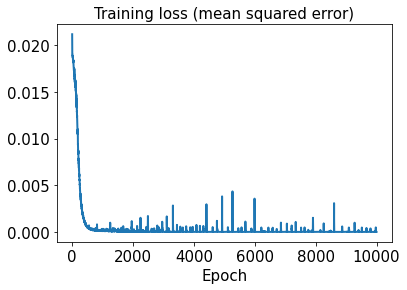

In [32]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

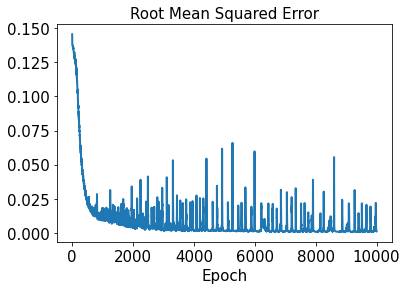

In [33]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [34]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [35]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [36]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

4.6011322e-05


In [37]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.0020649408


In [38]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [39]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

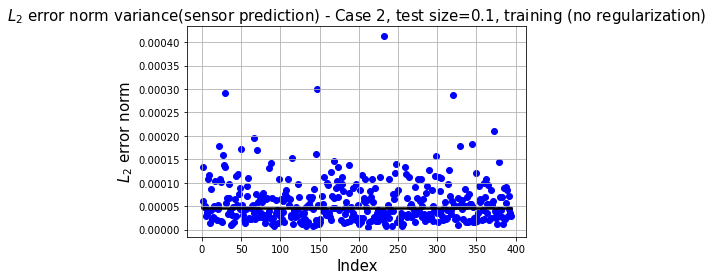

In [43]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training (no regularization)', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

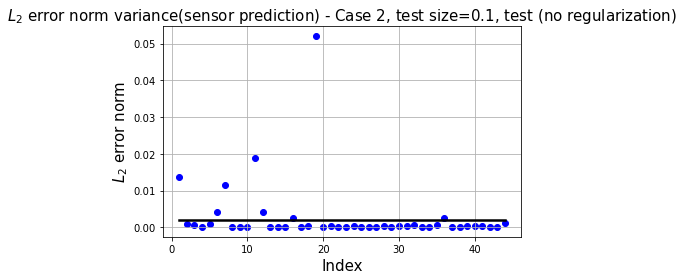

In [42]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test (no regularization)', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()